# Dataset exploration

In this notebook we calculate and plot metrics of the annotated documents, with the objective of describing and summarizing the resulting dataset 

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas
import os
import sys

In [2]:
import seaborn as sns
sns.set_style('white')
sns.set_palette('colorblind')

In [3]:
from collections import Counter

In [4]:
from imp import reload
import read_annotations
reload(read_annotations);

In [5]:
ANNOTATORS = {
    'C': {'dirname': 'C'}, 'L': {'dirname': 'L'}, 'M': {'dirname': 'M'}, 'S': {'dirname': 'S'}
}
ANNOTATION_DIR = os.path.join(os.path.expanduser('~'), 'am/data/echr/annotation/')
documents = read_annotations.get_all_documents(ANNOTATION_DIR, ANNOTATORS)

In [6]:
documents

defaultdict(list,
            {'C': [Case: TALMANE v. LATVIA - Ann: C,
              Case: ALKASI v. TURKEY - Ann: C],
             'L': [Case: B.S. v. SPAIN - Ann: L,
              Case: ALKASI v. TURKEY - Ann: L,
              Case: PERUS v. SLOVENIA - Ann: L],
             'M': [Case: D.J. v. CROATIA - Ann: M,
              Case: BARCZA AND OTHERS v HUNGARY - Ann: M,
              Case: TALMANE v. LATVIA - Ann: M,
              Case: ALKASI v. TURKEY - Ann: M,
              Case: EGITIM VE BILIM EMEKCILERI SENDIKASI v. TURKEY - Ann: M],
             'S': [Case: ALKASI v. TURKEY - Ann: S,
              Case: PERUS v. SLOVENIA - Ann: S]})

In [70]:
stats_columns = ['Tokens', 'Labeled Tokens', 'Claims', 'Premises', 'Major claims',
                 'Components', 'Relations']
statistics = pandas.DataFrame(
    index=[document.identifier 
           for annotator_documents in documents.values() for document in annotator_documents],
    columns=['Annotator'] + stats_columns)

def get_statistics(document, annotator):
    id = document.identifier
    words, labels = document.get_word_label_list()
    statistics.loc[id]['Annotator'] = annotator
    statistics.loc[id]['Tokens'] = len(words)
    statistics.loc[id]['Labeled Tokens'] = len(
        [label for label in labels if label != document.default_label])
    counts = Counter(labels)
    statistics.loc[id]['Claims'] = counts['claim']
    statistics.loc[id]['Major claims'] = counts['major-claim']
    statistics.loc[id]['Premises'] = counts['premise']
    statistics.loc[id]['Components'] = len(document.annotated_components)
    statistics.loc[id]['Relations'] = len(document.annotated_relations)

In [71]:
for annotator, annotator_documents in documents.items():
    for document in annotator_documents:
        get_statistics(document, annotator)
statistics[stats_columns] = statistics[stats_columns].astype(int)

In [72]:
statistics

,Annotator,Tokens,Labeled Tokens,Claims,Premises,Major claims,Components,Relations
Case: TALMANE v. LATVIA - Ann: C,C,2245,1046,241,749,56,34,23
Case: ALKASI v. TURKEY - Ann: C,C,2732,1330,361,879,90,51,43
Case: B.S. v. SPAIN - Ann: L,L,7098,2594,1059,1303,232,89,80
Case: ALKASI v. TURKEY - Ann: L,L,2732,1579,609,868,102,57,48
Case: PERUS v. SLOVENIA - Ann: L,L,3593,1443,394,1001,48,66,48
Case: PERUS v. SLOVENIA - Ann: S,S,3593,1969,583,1321,65,74,49
Case: ALKASI v. TURKEY - Ann: S,S,2732,1352,436,811,105,58,38
Case: BARCZA AND OTHERS v HUNGARY - Ann: M,M,4252,1998,758,1073,167,75,61
Case: D.J. v. CROATIA - Ann: M,M,5994,4349,2156,1847,346,145,124
Case: TALMANE v. LATVIA - Ann: M,M,2245,1244,476,740,28,54,42


In [75]:
statistics.sum()

Annotator         CCLLLSSMMMMMM
Tokens                    46045
Labeled Tokens            22009
Claims                     8385
Premises                  12242
Major claims               1382
Components                  814
Relations                   647
dtype: object

In [74]:
statistics.describe()

,Tokens,Labeled Tokens,Claims,Premises,Major claims,Components,Relations
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,3541.923077,1693.000000,645.000000,941.692308,106.307692,62.615385,49.769231
std,1478.614355,975.182034,513.366016,414.535962,94.135881,31.990984,28.563245
min,2245.000000,173.000000,128.000000,45.000000,0.000000,6.000000,3.000000
25%,2732.000000,1330.000000,394.000000,791.000000,48.000000,51.000000,41.000000
50%,2732.000000,1443.000000,476.000000,868.000000,90.000000,57.000000,47.000000
75%,3593.000000,1969.000000,730.000000,1073.000000,105.000000,74.000000,49.000000
max,7098.000000,4349.000000,2156.000000,1847.000000,346.000000,145.000000,124.000000


In [73]:
statistics.groupby('Annotator').describe()

Claims  Components  Labeled Tokens  Major claims  \
Annotator                                                                
C         count     2.000000    2.000000        2.000000      2.000000   
          mean    301.000000   42.500000     1188.000000     73.000000   
          std      84.852814   12.020815      200.818326     24.041631   
          min     241.000000   34.000000     1046.000000     56.000000   
          25%     271.000000   38.250000     1117.000000     64.500000   
          50%     301.000000   42.500000     1188.000000     73.000000   
          75%     331.000000   46.750000     1259.000000     81.500000   
          max     361.000000   51.000000     1330.000000     90.000000   
L         count     3.000000    3.000000        3.000000      3.000000   
          mean    687.333333   70.666667     1872.000000    127.333333   
          std     339.349869   16.502525      628.957073     94.579772   
          min     394.000000   57.000000     1443.000000     48.000000   
          25%     501.500000   61.500000     1511.000000     75.000000   
          50%     609.000000   66.000000     1579.000000    102.000000   
          75%     834.000000   77.500000     2086.500000    167.000000   
          max    1059.000000   89.000000     2594.000000    232.000000   
M         count     6.000000    6.000000        6.000000      6.000000   
          mean    783.666667   64.166667     1782.666667    114.000000   
          std     709.940185   45.657055     1395.233839    128.266909   
          min     128.000000    6.000000      173.000000      0.000000   
          25%     459.500000   51.000000     1275.000000     31.750000   
          50%     603.000000   54.500000     1466.000000     71.500000   
          75%     751.000000   70.000000     1889.500000    150.250000   
          max    2156.000000  145.000000     4349.000000    346.000000   
S         count     2.000000    2.000000        2.000000      2.000000   
          mean    509.500000   66.000000     1660.500000     85.000000   
          std     103.944697   11.313708      436.284884     28.284271   
          min     436.000000   58.000000     1352.000000     65.000000   
          25%     472.750000   62.000000     1506.250000     75.000000   
          50%     509.500000   66.000000     1660.500000     85.000000   
          75%     546.250000   70.000000     1814.750000     95.000000   
          max     583.000000   74.000000     1969.000000    105.000000   

                    Premises   Relations       Tokens  
Annotator                                              
C         count     2.000000    2.000000     2.000000  
          mean    814.000000   33.000000  2488.500000  
          std      91.923882   14.142136   344.361002  
          min     749.000000   23.000000  2245.000000  
          25%     781.500000   28.000000  2366.750000  
          50%     814.000000   33.000000  2488.500000  
          75%     846.500000   38.000000  2610.250000  
          max     879.000000   43.000000  2732.000000  
L         count     3.000000    3.000000     3.000000  
          mean   1057.333333   58.666667  4474.333333  
          std     222.904314   18.475209  2312.585206  
          min     868.000000   48.000000  2732.000000  
          25%     934.500000   48.000000  3162.500000  
          50%    1001.000000   48.000000  3593.000000  
          75%    1152.000000   64.000000  5345.500000  
          max    1303.000000   80.000000  7098.000000  
M         count     6.000000    6.000000     6.000000  
          mean    885.000000   53.000000  3553.333333  
          std     583.316381   39.764306  1409.538033  
          min      45.000000    3.000000  2245.000000  
          25%     752.750000   41.250000  2561.000000  
          50%     802.500000   44.500000  3162.500000  
          75%    1008.250000   57.500000  4087.250000  
          max    1847.000000  124.000000  5994.000000  
S         count     2.000000    2.000000     2.00

## Section distribution

In [7]:
doc = documents['S'][0]

In [8]:
type(doc)

preprocess.annotated_documents.AnnotatedJudgement

In [52]:
sections = pandas.DataFrame(columns=['Document', 'Section', 'Sentences'])
for annotator, docs in documents.items():
    for doc in docs:
        for section_name, count in zip(*numpy.unique([sentence.section for sentence in doc.sentences],
                                                     return_counts=True)):
            sections.loc[sections.shape[0]] = {
                'Document': doc.identifier.replace('Case: ', ''), 'Section': section_name[:10], 'Sentences': count}
sections[:10]

,Document,Section,Sentences
0,B.S. v. SPAIN - Ann: L,Admissibil,63.0
1,B.S. v. SPAIN - Ann: L,Default in,14.0
2,B.S. v. SPAIN - Ann: L,Introducti,195.0
3,ALKASI v. TURKEY - Ann: L,ALLEGED VI,6.0
4,ALKASI v. TURKEY - Ann: L,Admissibil,26.0
5,ALKASI v. TURKEY - Ann: L,Costs and,8.0
6,ALKASI v. TURKEY - Ann: L,Damage,9.0
7,ALKASI v. TURKEY - Ann: L,Introducti,23.0
8,ALKASI v. TURKEY - Ann: L,Merits,27.0
9,ALKASI v. TURKEY - Ann: L,The partie,5.0


In [53]:
sections.Section.unique()

array(['Admissibil', 'Default in', 'Introducti', 'ALLEGED VI',
       'Costs and ', 'Damage', 'Merits', 'The partie', 'PRELIMINAR',
       'Scope of t'], dtype=object)

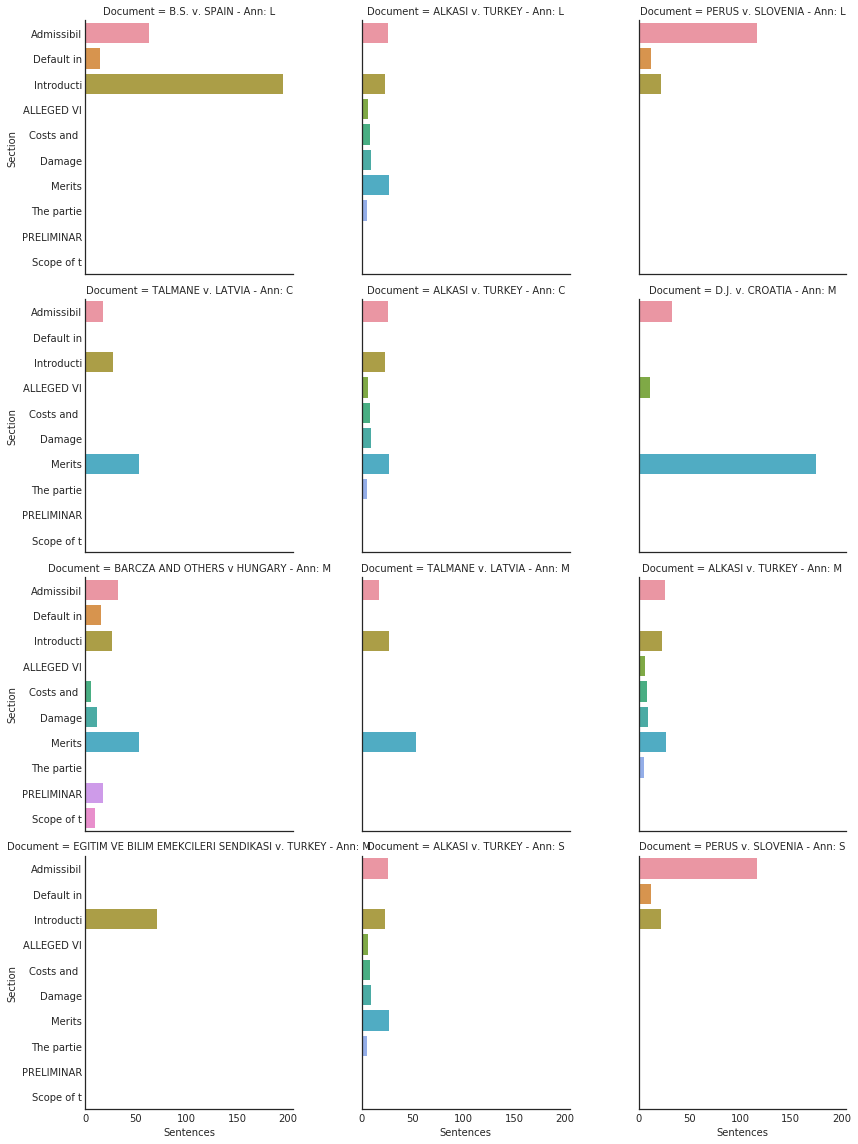

In [54]:
sns.factorplot(data=sections, x='Sentences', y='Section', col='Document', kind="bar", col_wrap=3, orient="h")

## Relations

In [49]:
relations = pandas.DataFrame(columns=['Document', 'Start', 'End', 'Label', 'Span'])
for annotator, docs in documents.items():
    for doc in docs:
        for start, info in doc.annotated_relations.items():
            for end, label in info.items():
                relations.loc[relations.shape[0]] = {
                    'Document': doc.identifier.replace('Case: ', ''),
                    'Start': start, 'End': end, 'Span': end-start,
                    'Label': label
                }
relations[['Document', 'Label', 'Start']].groupby(['Document', 'Label']).count()

Start
Document                                           Label           
ALKASI v. TURKEY - Ann: C                          Attack         1
                                                   Citation       7
                                                   Support       35
ALKASI v. TURKEY - Ann: L                          Attack         2
                                                   Citation       1
                                                   Duplicate      2
                                                   Support       45
ALKASI v. TURKEY - Ann: M                          Attack         3
                                                   Citation      10
                                                   Duplicate      2
                                                   Support       33
ALKASI v. TURKEY - Ann: S                          Attack         2
                                                   Citation       6
                                                   Duplicate      3
                                                   Support       28
B.S. v. SPAIN - Ann: L                             Attack         5
                                                   Support       75
BARCZA AND OTHERS v HUNGARY - Ann: M               Attack         3
                                                   Citation       6
                                                   Support       54
D.J. v. CROATIA - Ann: M                           Attack         3
                                                   Citation      12
                                                   Support      110
EGITIM VE BILIM EMEKCILERI SENDIKASI v. TURKEY ... Attack         2
                                                   Citation       6
                                                   Support       33
PERUS v. SLOVENIA - Ann: L                         Attack        16
                                                   Citation      16
                                                   Duplicate      1
                                                   Support       58
PERUS v. SLOVENIA - Ann: S                         Attack         5
                                                   Citation       8
                                                   Duplicate      1
                                                   Support       35
TALMANE v. LATVIA - Ann: C                         Attack         4
                                                   Support       19
TALMANE v. LATVIA - Ann: M                         Citation       5
                                                   Support       37

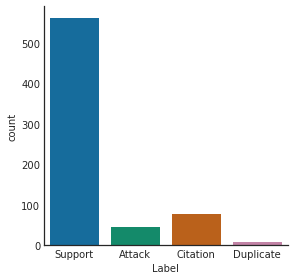

In [46]:
sns.factorplot(data=relations, x='Label', kind="count")

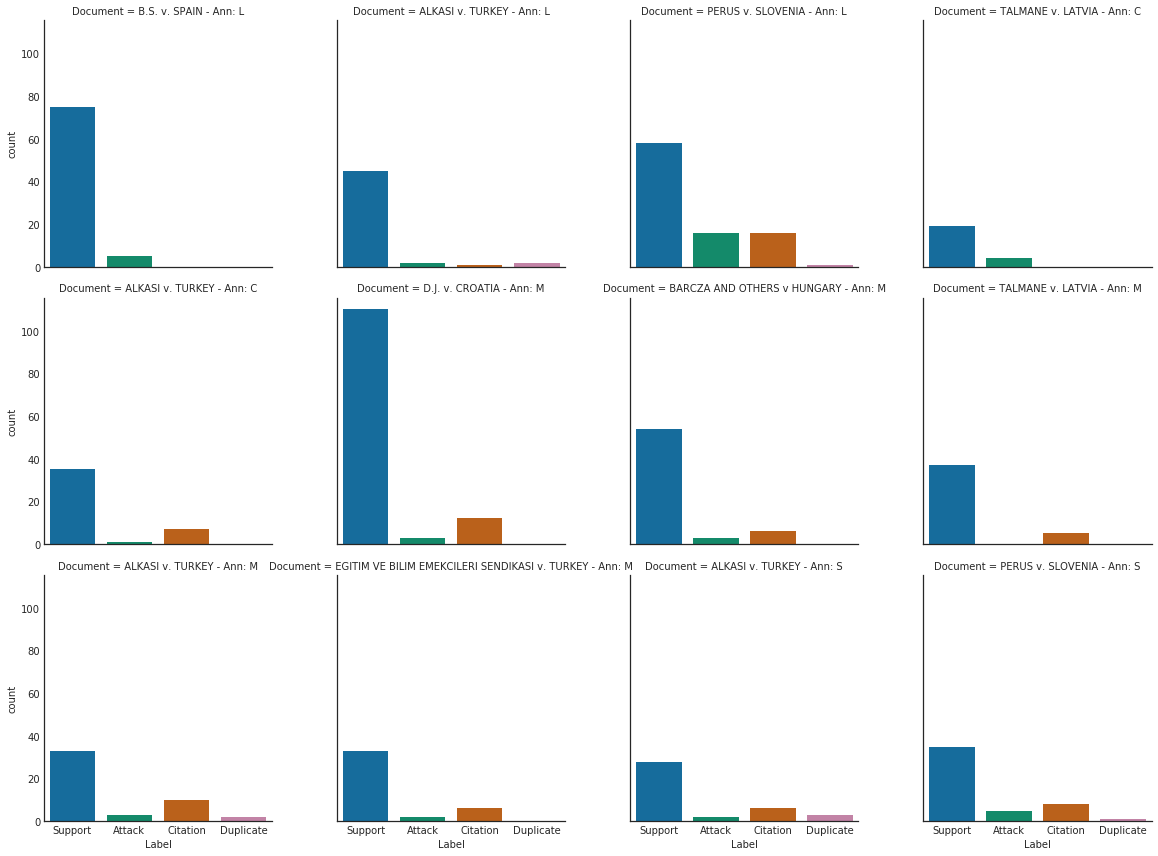

In [47]:
sns.factorplot(data=relations, x='Label', kind="count", col='Document', col_wrap=4)

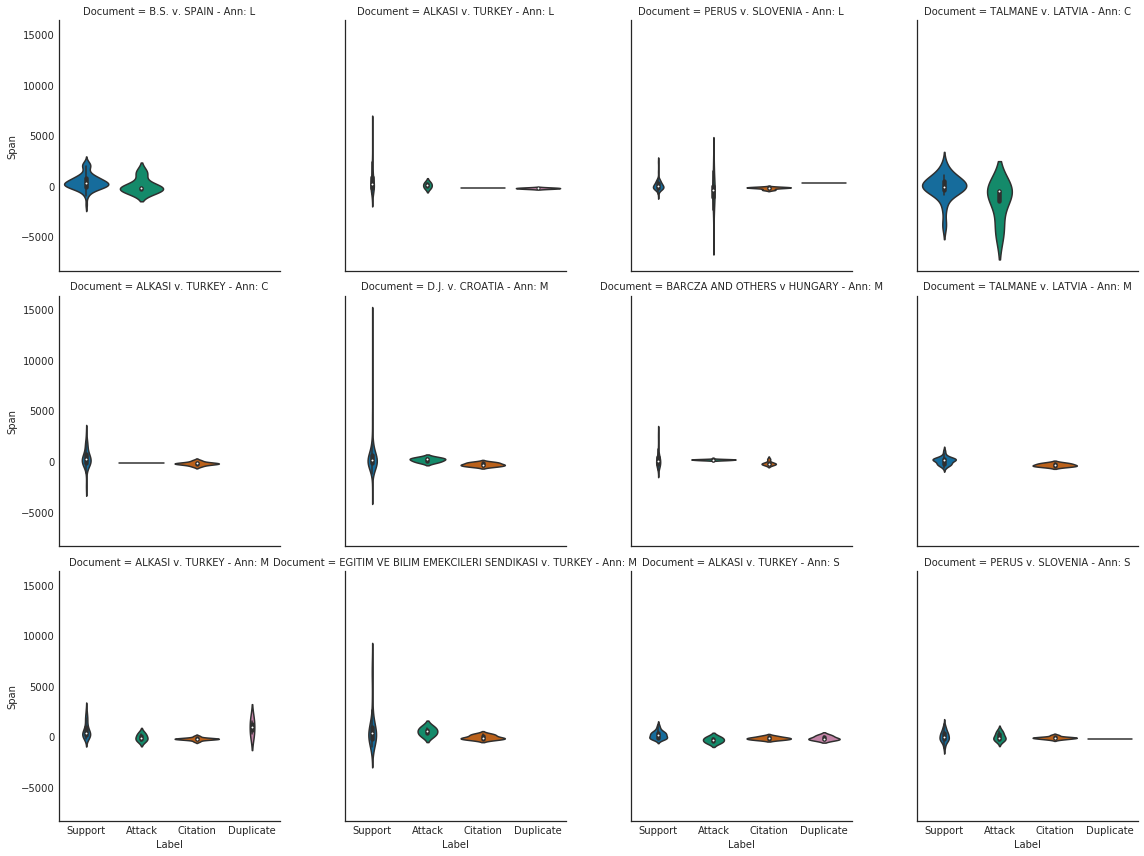

In [51]:
sns.factorplot(data=relations, x='Label', col='Document', y='Span', kind="violin", col_wrap=4)

In [55]:
labels = []
for annotator, docs in documents.items():
    for doc in docs:
        _, label = doc.get_word_label_list()
        labels.extend(label)
numpy.unique(labels, return_counts=True)

(array(['O', 'claim', 'major-claim', 'premise'], 
       dtype='<U11'), array([19785,  8370,  1516, 12702]))